In [1]:
import pandas as pd

# Bitcoin time series analysis...
-Viswanadh

In [2]:
df=pd.read_csv("bitcoin.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [5]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [9]:
df=df.set_index('Date')

In [10]:
df=df.sort_index()

In [11]:
df.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


# Exploratory data analysis

In [12]:
data=df.copy()

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Bitcoin price')

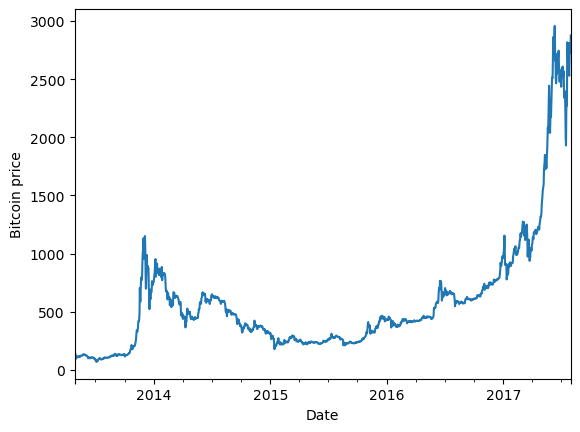

In [14]:
data['Close'].plot(kind="line")
plt.ylabel("Bitcoin price")

In [15]:
data2=data['Close']

In [16]:
data2.head(5)

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

# Resampling data

In [17]:
data2.resample('W').sum()

Date
2013-04-28      134.21
2013-05-05      831.90
2013-05-12      797.48
2013-05-19      830.97
2013-05-26      894.13
                ...   
2017-07-09    17984.69
2017-07-16    15629.11
2017-07-23    17846.60
2017-07-30    18825.21
2017-08-06     2875.34
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

In [18]:
data2.resample('M').sum()

Date
2013-04-30      417.75
2013-05-31     3719.79
2013-06-30     3232.84
2013-07-31     2805.88
2013-08-31     3531.06
2013-09-30     3901.85
2013-10-31     4907.67
2013-11-30    16512.62
2013-12-31    24824.21
2014-01-31    26169.22
2014-02-28    18525.31
2014-03-31    18358.21
2014-04-30    13840.86
2014-05-31    15086.19
2014-06-30    18477.52
2014-07-31    19158.79
2014-08-31    16618.72
2014-09-30    13355.59
2014-10-31    11288.65
2014-11-30    10983.00
2014-12-31    10579.32
2015-01-31     7712.26
2015-02-28     6556.30
2015-03-31     8340.28
2015-04-30     7064.75
2015-05-31     7346.90
2015-06-30     7142.43
2015-07-31     8666.48
2015-08-31     7772.77
2015-09-30     7007.86
2015-10-31     8210.51
2015-11-30    10466.50
2015-12-31    13158.40
2016-01-31    12736.18
2016-02-29    11727.84
2016-03-31    12912.28
2016-04-30    13030.18
2016-05-31    14320.57
2016-06-30    19286.09
2016-07-31    20502.02
2016-08-31    17967.14
2016-09-30    18175.45
2016-10-31    19950.05
2016-1

<AxesSubplot:xlabel='Date'>

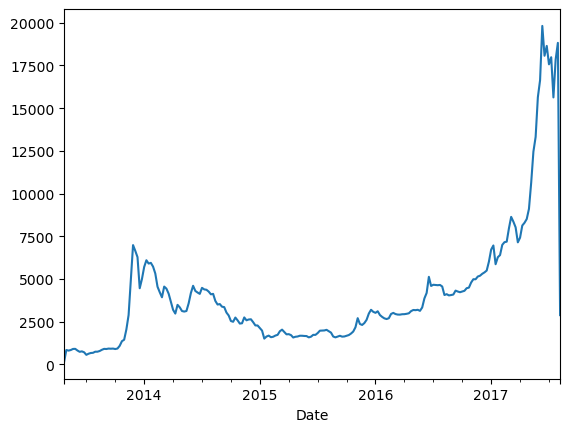

In [19]:
data2.resample('W').sum().plot(kind="line")

<AxesSubplot:xlabel='Date'>

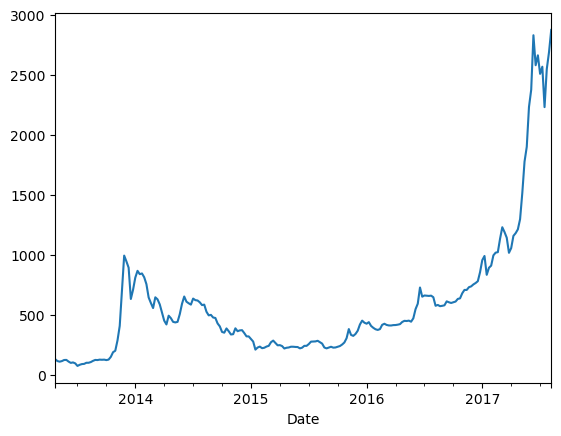

In [20]:
data2.resample('W').mean().plot(kind="line")

<AxesSubplot:xlabel='Date'>

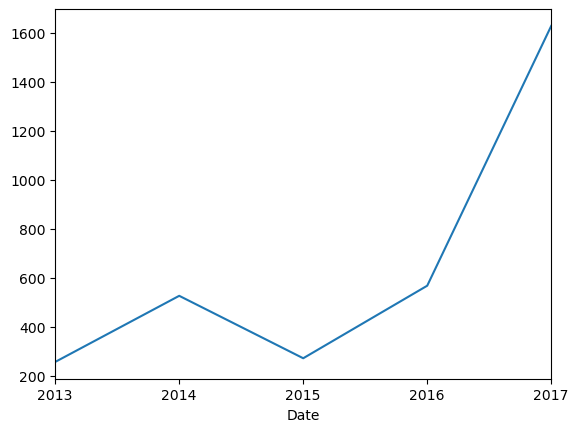

In [21]:
data2.resample("Y").mean().plot(kind="line")

In [22]:
!pip install prophet

In [23]:
import prophet

In [24]:
data.groupby(data2.index.dayofweek)['Close'].mean()

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

# EDA W.R.T WEEKDAY AND YEARDAY

<AxesSubplot:xlabel='Date'>

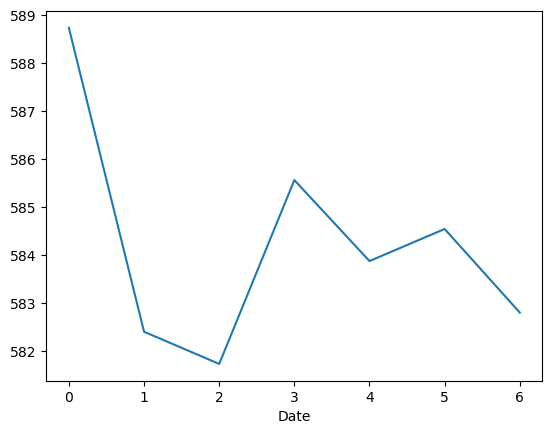

In [25]:
data.groupby(data2.index.dayofweek)['Close'].mean().plot(kind="line")

In [26]:
weekday=data.groupby(data2.index.dayofweek)['Close'].mean()

In [27]:
weekday.index=["MON","TUE","WED","THU","FRI","SAT","SUN"]

In [28]:
weekday

MON    588.738655
TUE    582.402658
WED    581.731216
THU    585.565135
FRI    583.876622
SAT    584.545180
SUN    582.802511
Name: Close, dtype: float64

Text(0, 0.5, 'Close')

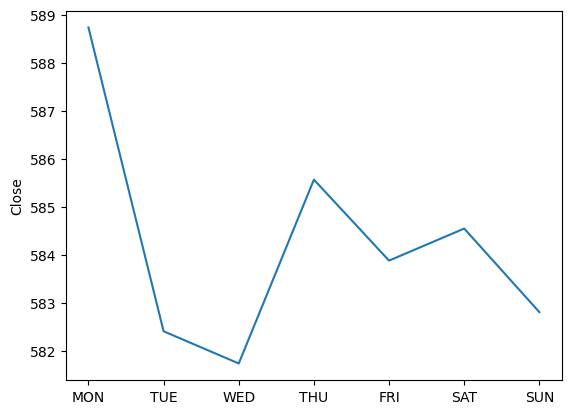

In [29]:
weekday.plot(kind="line")
plt.ylabel("Close")

In [30]:
data2.index

DatetimeIndex(['2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
               '2013-05-06', '2013-05-07',
               ...
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
               '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', name='Date', length=1556, freq=None)

In [31]:
data.groupby(data2.index.dayofyear)['Close'].mean()

Date
1      629.5775
2      643.1525
3      643.4125
4      677.8800
5      663.3350
         ...   
362    600.1375
363    616.6550
364    616.7475
365    616.5025
366    963.7400
Name: Close, Length: 366, dtype: float64

In [32]:
year_day=data.groupby(data.index.dayofyear)['Close'].mean()

Text(0, 0.5, 'Closing price')

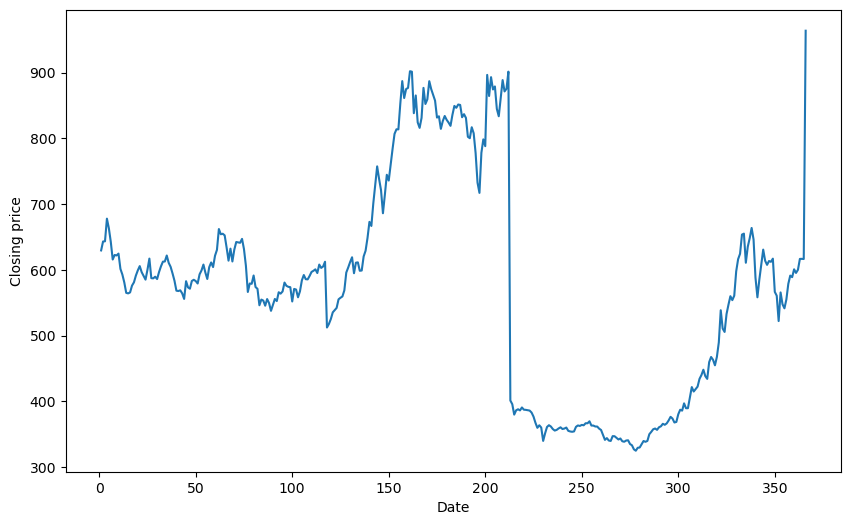

In [33]:
plt.figure(figsize=(10,6))
year_day.plot(kind="line")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

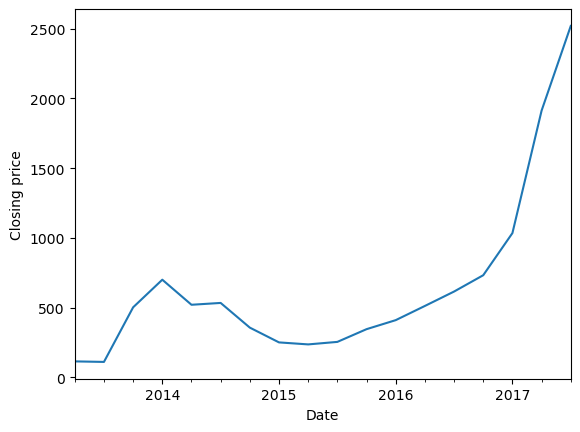

In [34]:
data['Close'].resample('Q').mean().plot(kind="line")
plt.ylabel("Closing price")

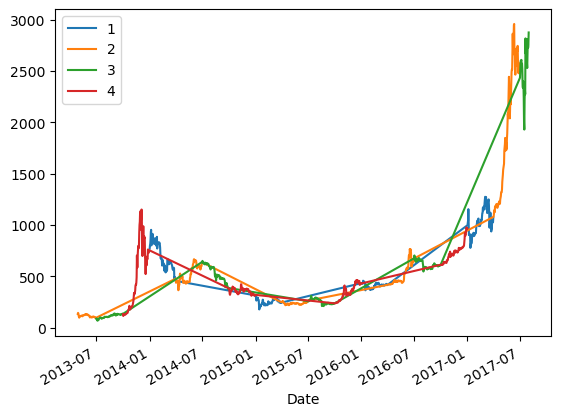

In [35]:
data.groupby(data2.index.quarter)['Close'].plot(kind="line")
plt.legend()

# Analyze the trend of closing price in weekdays and weekends

In [36]:
type(weekday)

pandas.core.series.Series

In [37]:
weekday

MON    588.738655
TUE    582.402658
WED    581.731216
THU    585.565135
FRI    583.876622
SAT    584.545180
SUN    582.802511
Name: Close, dtype: float64

In [38]:
weekday

MON    588.738655
TUE    582.402658
WED    581.731216
THU    585.565135
FRI    583.876622
SAT    584.545180
SUN    582.802511
Name: Close, dtype: float64

In [39]:
data['WeekDay']=data2.index.dayofweek

In [40]:
data.head(5)

,Open,High,Low,Close,Volume,Market Cap,WeekDay
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3


In [41]:
def Week(row):
    if row['WeekDay']==6 or row['WeekDay']==7:
        return "Weekend"
    else:
        return "Weekday"

In [42]:
data['Weekday/Weekend']=data.apply(Week,axis=1)

In [43]:
data.head(5)

,Open,High,Low,Close,Volume,Market Cap,WeekDay,Weekday/Weekend
Date,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6,Weekend
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0,Weekday
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1,Weekday
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2,Weekday
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3,Weekday


<AxesSubplot:xlabel='Weekday/Weekend'>

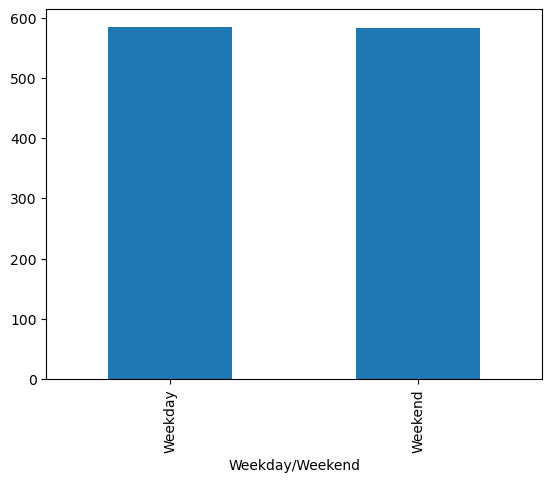

In [44]:
data.groupby(['Weekday/Weekend'])['Close'].mean().plot(kind="bar")

In [45]:
data['prediction_naive']=data['Close'].shift(1)

In [46]:
data.head(5)

,Open,High,Low,Close,Volume,Market Cap,WeekDay,Weekday/Weekend,prediction_naive
Date,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6,Weekend,NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0,Weekday,134.21
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1,Weekday,144.54
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2,Weekday,139.00
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3,Weekday,116.99


<AxesSubplot:xlabel='Date'>

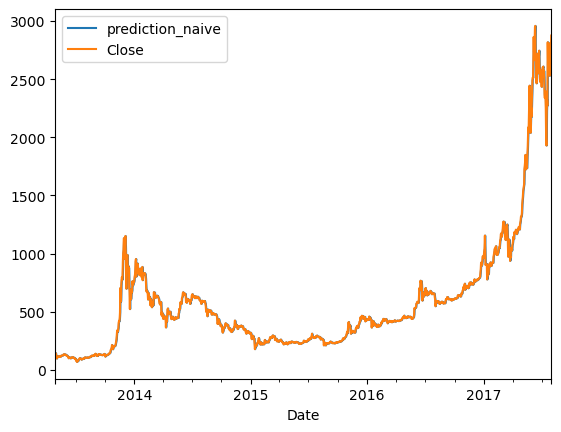

In [47]:
data[['prediction_naive','Close']].plot(kind="line")

In [48]:
from sklearn.metrics import mean_squared_error

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [49]:
import numpy as np

In [50]:
np.sqrt(mean_squared_error(data['prediction_naive'][1:],data['Close'][1:]))

37.23363264835875

# Checking for noise

In [51]:
mean=data['Close'].rolling(window=7).mean()
std=data['Close'].rolling(window=7).std()

<AxesSubplot:xlabel='Date'>

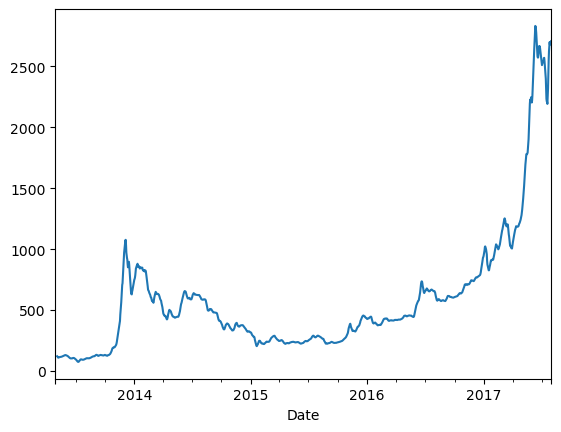

In [52]:
mean.plot(kind="line")

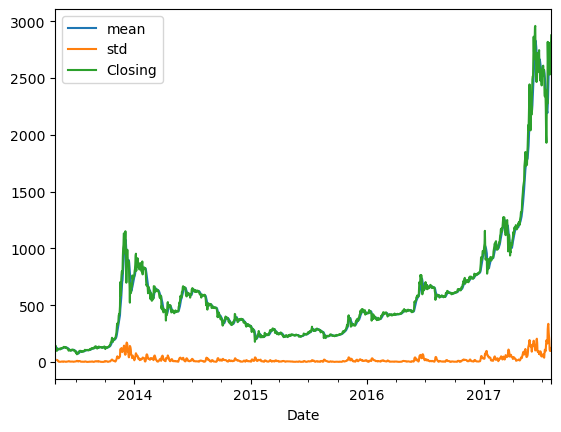

In [53]:
mean.plot(label="mean")
std.plot(label="std")
data['Close'].plot(label="Closing")
plt.legend()

# Performing Statistical tests to detect Stationarity

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
results=adfuller(data['Close'])
labels=['Adf','P','lags','no.of obs']
for value,label in zip(results,labels):
    print('{}:{}'.format(label,value))

Adf:2.5355885873886206
P:0.9990604352222925
lags:24
no.of obs:1531


In [56]:
def test_stationarity(df,feature):
    df[feature].plot(label="feature")
    mean=df[feature].rolling(window=7).mean()
    std=df[feature].rolling(window=7).std()
    mean.plot(label="mean")
    std.plot(label="std")
    res=adfuller(df[feature].dropna())
    lab=['Adf','P','lags','no.of obs']
    for val,label in zip(res,lab):
        print('{},{}'.format(label,val))
    if res[1]<=0.05:
        print("The curves is stationary")
    else:
        print("The curve does not have a constant mean and standard deviation-variance")
    

Adf,2.5355885873886206
P,0.9990604352222925
lags,24
no.of obs,1531
The curve does not have a constant mean and standard deviation-variance


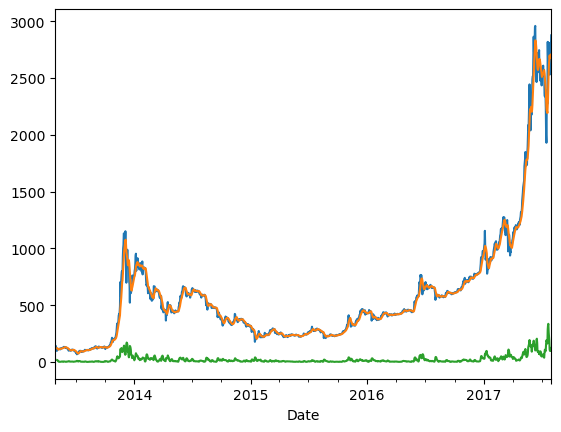

In [57]:
test_stationarity(data,'Close')

LET'S DIFFERENCE THE DATA TO MAKE IT STATIONARY,HENCE WE CAN OBTAIN BETTER RESULTS WHEN FORECASTING USING RNN'S AND LSTM'S

In [58]:
df=data[["Close"]]

In [59]:
df

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
...,...
2017-07-27,2671.78
2017-07-28,2809.01
2017-07-29,2726.45


In [60]:
df2=df.diff().diff()

In [61]:
df2.head()

,Close
Date,
2013-04-28,NaN
2013-04-29,NaN
2013-04-30,-15.87
2013-05-01,-16.47
2013-05-02,10.23


In [62]:
df2=df[2:]

In [63]:
df2

,Close
Date,
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75
2013-05-04,112.50
...,...
2017-07-27,2671.78
2017-07-28,2809.01
2017-07-29,2726.45


Adf,2.5376543848337394
P,0.9990609953730594
lags,24
no.of obs,1529
The curve does not have a constant mean and standard deviation-variance


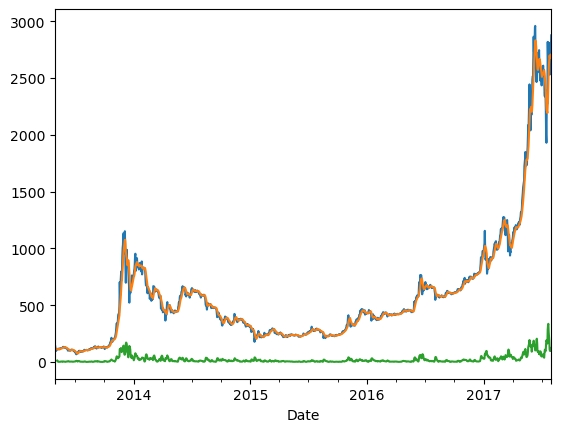

In [64]:
test_stationarity(df2,'Close')

# TENSORFLOW

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [66]:
length=25
n_features=1

# PREDICTION USING LSTM

In [67]:
model=Sequential()
model.add(LSTM(25,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.compile(optimizer="adam",loss="mse")

In [69]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
df.shape

(1556, 1)

In [71]:
scaled_train=df[:1526]

In [72]:
scaled_train=np.asarray(scaled_train)

In [73]:
scaled_train.shape

(1526, 1)

In [74]:
scaled_train=scaled_train.reshape(-1,1)

In [75]:
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [76]:
model.fit(generator,epochs=5)

Epoch 1/5
  21/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 20612882.0000

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1501/1501 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1826584.2500
Epoch 2/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 98005.9766
Epoch 3/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 55634.7461
Epoch 4/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 23373.8633
Epoch 5/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 8474.4307


In [77]:
generator[0]

(array([[[134.21],
         [144.54],
         [139.  ],
         [116.99],
         [105.21],
         [ 97.75],
         [112.5 ],
         [115.91],
         [112.3 ],
         [111.5 ],
         [113.57],
         [112.67],
         [117.2 ],
         [115.24],
         [115.  ],
         [117.98],
         [111.5 ],
         [114.22],
         [118.76],
         [123.02],
         [123.5 ],
         [121.99],
         [122.  ],
         [122.88],
         [123.89]]]),
 array([[126.7]]))

In [78]:
scaled_train[25]

array([126.7])

GENERATOR HAS RETURNED THE ACCURATE VALUE

In [79]:
first_eval_batch=scaled_train[-length:]

In [80]:
first_eval_batch

array([[2732.16],
       [2805.62],
       [2823.81],
       [2947.71],
       [2958.11],
       [2659.63],
       [2717.02],
       [2506.37],
       [2464.58],
       [2518.56],
       [2655.88],
       [2548.29],
       [2589.6 ],
       [2721.79],
       [2689.1 ],
       [2705.41],
       [2744.91],
       [2608.72],
       [2589.41],
       [2478.45],
       [2552.45],
       [2574.79],
       [2539.32],
       [2480.84],
       [2434.55]])

In [81]:
np.shape(first_eval_batch)

(25, 1)

In [82]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [83]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


array([[1951.7653]], dtype=float32)

In [84]:
df.iloc[1526]

Close    2506.47
Name: 2017-07-02 00:00:00, dtype: float64

In [85]:
results=[]
i=25
sliding_set=df.iloc[1501:1526]
while i!=0:    
    sliding_set=np.asarray(sliding_set)
    sliding_set=sliding_set.reshape((1,length,n_features))
    ans=model.predict(sliding_set)
    print(ans)
    results.append(ans.tolist()[0][0])
    sliding_set=sliding_set.reshape(-1)
    sliding_set=sliding_set.tolist()
    sliding_set.pop(0)
    sliding_set.append(ans.tolist()[0][0])
    i-=1
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1951.7653]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1884.5603]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1879.9569]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1854.4355]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1819.4957]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1983.7229]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[2882.46]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2241.8005]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1866.1489]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[1903.8126]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1981.5947]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2046.6079]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2103.6309]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[2147.6284]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[2116.3]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1857.2025]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1804.0789]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[2047.4806]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2185.7305]]
1/1 ━━━━━━━━━━━━━

In [86]:
print(results)

[1951.7652587890625, 1884.560302734375, 1879.9569091796875, 1854.435546875, 1819.4957275390625, 1983.722900390625, 2882.4599609375, 2241.800537109375, 1866.14892578125, 1903.8126220703125, 1981.5947265625, 2046.60791015625, 2103.630859375, 2147.62841796875, 2116.300048828125, 1857.2025146484375, 1804.078857421875, 2047.4805908203125, 2185.73046875, 2292.092041015625, 2449.72705078125, 2860.992431640625, 2408.650146484375, 1593.826416015625, 807.9248046875]


In [87]:
results_df=pd.DataFrame(results)

In [88]:
results_df

,0
0,1951.765259
1,1884.560303
2,1879.956909
3,1854.435547
4,1819.495728
5,1983.722900
6,2882.459961
7,2241.800537
8,1866.148926
9,1903.812622


In [89]:
actual_df=df[1526:1551]

In [90]:
actual_df

,Close
Date,
2017-07-02,2506.47
2017-07-03,2564.06
2017-07-04,2601.64
2017-07-05,2601.99
2017-07-06,2608.56
2017-07-07,2518.66
2017-07-08,2571.34
2017-07-09,2518.44
2017-07-10,2372.56


In [91]:
actual_df.reset_index(inplace=True)

In [92]:
actual_df.drop("Date",axis=1,inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_10808\3396896425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df.drop("Date",axis=1,inplace=True)


In [93]:
actual_df

,Close
0,2506.47
1,2564.06
2,2601.64
3,2601.99
4,2608.56
5,2518.66
6,2571.34
7,2518.44
8,2372.56
9,2337.79


In [94]:
comparision_df=pd.concat([results_df,actual_df],axis=1)

In [95]:
comparision_df

,0,Close
0,1951.765259,2506.47
1,1884.560303,2564.06
2,1879.956909,2601.64
3,1854.435547,2601.99
4,1819.495728,2608.56
5,1983.722900,2518.66
6,2882.459961,2571.34
7,2241.800537,2518.44
8,1866.148926,2372.56
9,1903.812622,2337.79


In [96]:
comparision_df.columns=["LSTM","ACTUAL"]

In [97]:
comparision_df

,LSTM,ACTUAL
0,1951.765259,2506.47
1,1884.560303,2564.06
2,1879.956909,2601.64
3,1854.435547,2601.99
4,1819.495728,2608.56
5,1983.722900,2518.66
6,2882.459961,2571.34
7,2241.800537,2518.44
8,1866.148926,2372.56
9,1903.812622,2337.79


<AxesSubplot:>

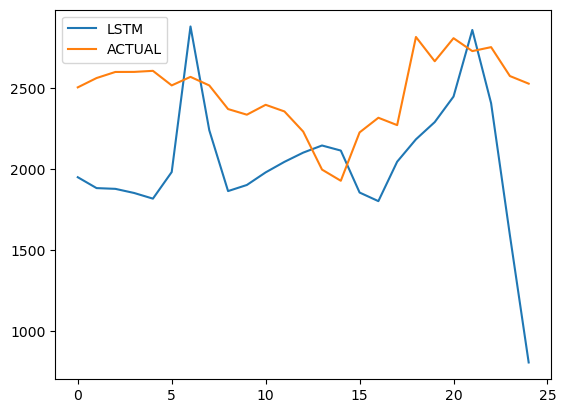

In [98]:
comparision_df.plot()

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
y_true=comparision_df["ACTUAL"]
y_predicted=comparision_df["LSTM"]

In [101]:
print("The standard dev is ",np.sqrt(mean_squared_error(y_true,y_predicted)/25))

The standard dev is  119.40527542492974


# RNN

In [102]:
model=Sequential()
model.add(SimpleRNN(25,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
model.compile(optimizer="adam",loss="mse")

In [104]:
scaled_train=df[:1526]

In [105]:
scaled_train=np.asarray(scaled_train)

In [106]:
scaled_train.shape

(1526, 1)

In [107]:
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [108]:
model.fit(generator,epochs=5)

Epoch 1/5
  40/1501 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 131027.9297

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 18301.5742
Epoch 2/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1952.1432
Epoch 3/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2026.6761
Epoch 4/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1352.6781
Epoch 5/5
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1472.5283


In [109]:
generator[0]

(array([[[134.21],
         [144.54],
         [139.  ],
         [116.99],
         [105.21],
         [ 97.75],
         [112.5 ],
         [115.91],
         [112.3 ],
         [111.5 ],
         [113.57],
         [112.67],
         [117.2 ],
         [115.24],
         [115.  ],
         [117.98],
         [111.5 ],
         [114.22],
         [118.76],
         [123.02],
         [123.5 ],
         [121.99],
         [122.  ],
         [122.88],
         [123.89]]]),
 array([[126.7]]))

In [110]:
scaled_train[25]

array([126.7])

In [111]:
first_eval_batch=scaled_train[-length:]

In [112]:
first_eval_batch

array([[2732.16],
       [2805.62],
       [2823.81],
       [2947.71],
       [2958.11],
       [2659.63],
       [2717.02],
       [2506.37],
       [2464.58],
       [2518.56],
       [2655.88],
       [2548.29],
       [2589.6 ],
       [2721.79],
       [2689.1 ],
       [2705.41],
       [2744.91],
       [2608.72],
       [2589.41],
       [2478.45],
       [2552.45],
       [2574.79],
       [2539.32],
       [2480.84],
       [2434.55]])

In [113]:
np.shape(first_eval_batch)

(25, 1)

In [114]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [115]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[2403.148]], dtype=float32)

In [116]:
results_r=[]
i=25
sliding_set=df.iloc[1501:1526]
while i!=0:    
    sliding_set=np.asarray(sliding_set)
    sliding_set=sliding_set.reshape((1,length,n_features))
    ans=model.predict(sliding_set)
    print(ans)
    results_r.append(ans.tolist()[0][0])
    sliding_set=sliding_set.reshape(-1)
    sliding_set=sliding_set.tolist()
    sliding_set.pop(0)
    sliding_set.append(ans.tolist()[0][0])
    i-=1
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2403.148]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[2354.1565]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[2302.6409]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2253.1309]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[2208.1343]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2165.4697]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[2123.8174]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[2082.8918]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[2042.6207]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[2002.9762]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1964.0658]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1925.9124]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1888.4922]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1851.8112]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[1815.8506]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1780.6075]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1746.0511]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1712.1766]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1678.9639]]
1/1 ━━━━━━━━━

In [117]:
results_r_df=pd.DataFrame(results_r)

In [118]:
results_r_df

,0
0,2403.147949
1,2354.156494
2,2302.640869
3,2253.130859
4,2208.134277
5,2165.469727
6,2123.817383
7,2082.891846
8,2042.620728
9,2002.976196


In [119]:
concat_df=pd.concat([actual_df,results_r_df,results_df],axis=1)

In [120]:
concat_df.columns=["ACTUAL","RNN","LSTM"]

In [121]:
concat_df

,ACTUAL,RNN,LSTM
0,2506.47,2403.147949,1951.765259
1,2564.06,2354.156494,1884.560303
2,2601.64,2302.640869,1879.956909
3,2601.99,2253.130859,1854.435547
4,2608.56,2208.134277,1819.495728
5,2518.66,2165.469727,1983.722900
6,2571.34,2123.817383,2882.459961
7,2518.44,2082.891846,2241.800537
8,2372.56,2042.620728,1866.148926
9,2337.79,2002.976196,1903.812622


<AxesSubplot:>

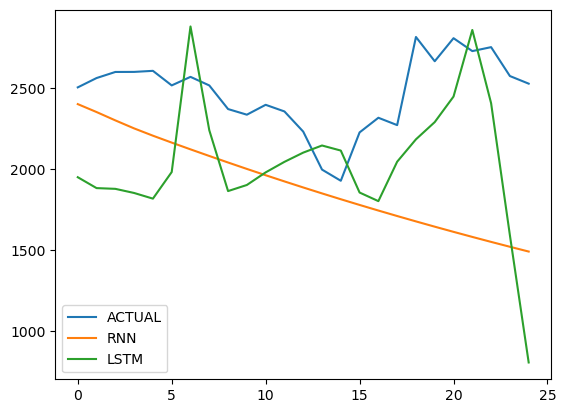

In [122]:
concat_df.plot()

In [123]:
y_true=concat_df["ACTUAL"]
y_rnn=concat_df["RNN"]
y_lstm=concat_df["LSTM"]

In [124]:
print("The standard dev between actual value and rnn predictions ",np.sqrt(mean_squared_error(y_true,y_rnn)/25))
print("The standard dev between actual value and lstm predictions",np.sqrt(mean_squared_error(y_true,y_lstm)/25))

The standard dev between actual value and rnn predictions  134.1749423405575
The standard dev between actual value and lstm predictions 119.40527542492974
